In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("F:\GitHub_Clones\streaming-and-nlp\data\\nlp-learn\\raw_reviews.csv")

In [5]:
dataset.shape

(14630, 11)

In [6]:
df = dataset[:2500]

In [7]:
df.shape

(2500, 11)

## We are going to work on 2.5K records of the dataset.

-   Review length distribution
-   Star ratings distribution
-   Missing / empty reviews


In [17]:
df.head(5)

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date,timestamp
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1.766508e+09
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1.766508e+09
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.766508e+09
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1.766508e+09
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.766508e+09


In [18]:
### Reviewing length distribution


def comment_len(text: str):
    return len(text.strip())

df['comment_length'] = df.text.apply(comment_len)

In [19]:
df["comment_length_bucket"] = pd.cut(
    df["comment_length"],
    bins=[0, 250, 500, 1000, float('inf')],
    labels=["0-249", "250-499", "500-999", "1000+"],
)

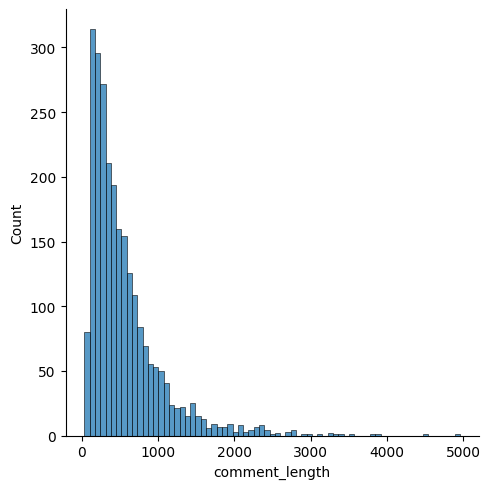

In [20]:
sns.displot(df, x='comment_length')

In [21]:
df.columns

Index(['_id', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'timestamp', 'comment_length',
       'comment_length_bucket'],
      dtype='object')

### Stars Distribution

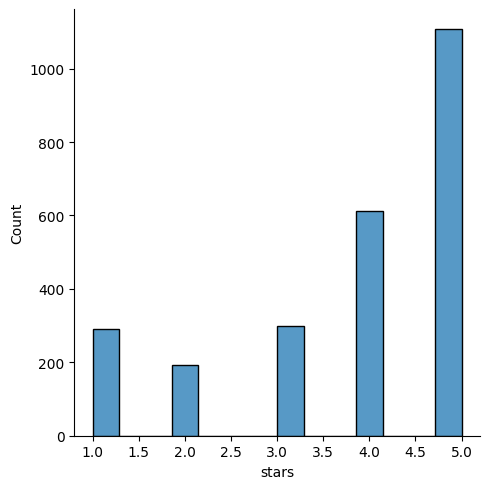

In [22]:
sns.displot(df, x='stars')

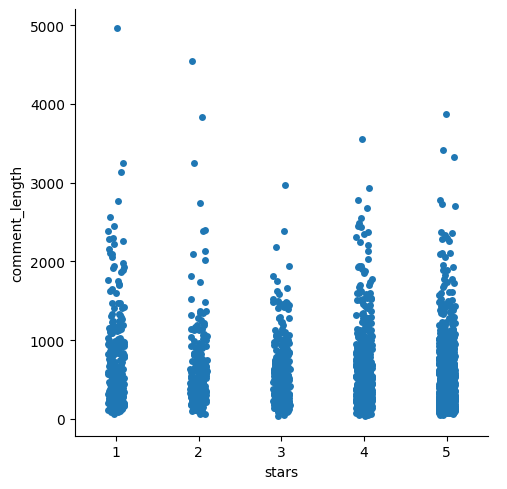

In [23]:
sns.catplot(df, x='stars', y='comment_length')

## Goal: Convert raw text into a clean, consistent format.

Concepts
- Lowercasing
- Removing punctuation
- Removing numbers
- Handling emojis
- Removing extra spaces

In [28]:
import re


# \b\d+\b -> for whole number
# \d for single digit
# \d+ for consecutive digits


punctuation_pattern = re.compile(r"[^\w\s\d+]")

emoji_pattern = re.compile(
    "["
    "\U0001f600-\U0001f64f"  # Emoticons
    "\U0001f300-\U0001f5ff"  # Symbols & Pictographs
    "\U0001f680-\U0001f6ff"  # Transport & Map Symbols
    "\U0001f1e0-\U0001f1ff"  # Flags (iOS)
    "\U0001f900-\U0001f9ff"  # Supplemental Symbols
    "\U00002702-\U000027b0"  # Dingbats
    "\U000024c2-\U0001f251"  # Enclosed Alphanumeric
    "]+",
    flags=re.UNICODE,
)


def clean_text(text):
    cleaned = punctuation_pattern.sub("", text).lower().strip()
    cleaned = emoji_pattern.sub('', cleaned)
    return cleaned

In [ ]:
df['cleaned_text'] = df.text.apply(clean_text)
df['cleaned_text_length'] = df.text.str.len()

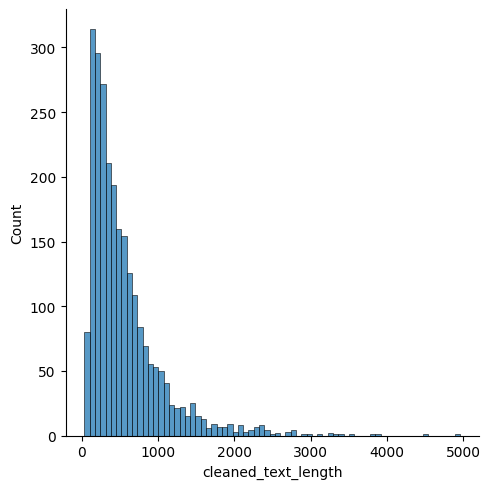

In [ ]:
sns.displot(df, x='cleaned_text_length')

----

## Goal: Break text into meaningful units.

### Concepts

-   Sentence tokenization
-   Word tokenization
-   Stopwords
-   Lemmatization vs Stemming

## Tasks

-   Tokenize reviews into words.
-   Remove stopwords and compare:
-   Before vs after removal
-   Apply stemming and lemmatization → compare outputs.

Answer:

Which is better for reviews and why?


## Tokenization:

-   the crucial first step of breaking down raw text into smaller, meaningful units called tokens
-   each token can be words, characters, sub-words, or sentences, making text manageable for machines to process, analyze, and understand
-   for tasks like translation, sentiment analysis, or chatbots

### Types of tokenization

-   **Word Tokenization**:
    -   Splits text into individual words based on spaces or punctuation.
    -   Example: `"NLP is fun!"` becomes `["NLP", "is", "fun", "!"]`.
-   **Sub-word Tokenization**:
    -   Breaks words into smaller meaningful units (morphemes), like prefixes or suffixes.
    -   It handles rare words or misspellings effectively. Example: `"unhappiness"` becomes `["un", "happiness"]`.
-   **Character Tokenization**:
    -   Treats every single character as a token. It is useful for languages without clear word boundaries, like Chinese or Japanese.
-   **Sentence Tokenization**:
    -   Segments large blocks of text into distinct sentences.


----

## Word Tokenizer:

-   Simply breaks text into individual words.
-   breaking a stream of text into individual words or unit token.
-   Used on language with clear boundaries; eg. English (space acts as separator)

### Core Approaches:

-   **Whitespace Tokenizer**:
    -   Splits text whenever a space is encountered.
-   **Punctuation-based Tokenizer**:
    -   Splits on basis of both Punctuation and Whitespace
    -   can treat each punctuation as a standalone token
-   **Rule-based Tokenization**
    -   Predefined linguistic rules or regex to handle complex cases like `do'nt` -> `["do", "n't"]` or hyphenated words.
-   **Multi-Word Expression**
    -   Groups multiple words into a single token if they represent a single entity
    -   Eg. San Diego, Natural Language Processing

### Key Challenges

-   **Out-of-Vocabulary (OOV) Words**:
    -   Word tokenizers struggle with rare or new words not present in their training vocabulary
    -   often replacing them with a generic [UNK] (unknown) token, which loses semantic information.
-   **Ambiguity**:
    -   Deciding whether to split entities like `"New York"` or contractions like `"can't"` can lead to inconsistent results.
-   **Language Limitations**:
    -   It is ineffective for languages like Chinese, Japanese, or Thai that do not use spaces to separate words.
-   **Vocabulary Size**:
    -   For large datasets, the number of unique word tokens can explode, requiring massive computational resources to process.


In [ ]:
from typing import List


def word_tokenizer(text: str) -> List[str]:
    return text.strip().split(" ")


word_tokenizer("This is example of word tokenizer.")

['This', 'is', 'example', 'of', 'word', 'tokenizer.']

----

## Punctuation Based Tokenization:

- Rule based technique
- treats punctuation marks as primary boundary markers to segment
- overcomes issue of tokens containing punctuation marks.
- isolates punctuation marks as their own distinct token

### Key Characteristics

- **Isolates Symbols**:
  - separates marks like common, periods etc points from the word they touch.
- **Dual Utility**:
  - Either **discard** punctuation to focus solely on words or **retain** it is as separates tokens
  - Essential for understanding sentence structure or sentiment
- **Deterministic Logic**:
  - Operates on fixed logic or regular expression.
  - Ensures consistence results for identical inputs.

### Implementations:

- NLTK's: `WordPunctTokenizer`
- SpaCyL
- Regular Expression: patterns like `\w+` to find words ignoring punctuation.

### Challenges:

- **Contractions**:
  - Words like `don't` and `it's` may be split into multiple fragment
  - it can strip the word from it's indented meaning
  - eg. `it's` -> `["it", "'", "s"]`
- **Abbreviations**:
  - It may incorrectly split abbreviations like "U.S.A." into single letters and periods
  - eg: `U.S.A` -> `["U", ".", "S", ".", "A", "."]`
- **Compound Words**:
  - Hyphenated terms might be broken into multiple tokens. Losing there unified context
  - `"state-of-the-art"` -> `["state", "-" ,"of", "-" ,"the", "-" ,"art"]`


In [ ]:
import re
from typing import List


def punctuation_based_tokenizer(text: str) -> List[str]:
    """
    \w+ -> match all single or consecutive alphanumeric.  
    | -> OR  
    [^\w\s] -> Match any single char or consecutive that is not a word char or white space  
    """
    pattern = re.compile(r"[\w']+|[^\w\s]+")
    result = pattern.findall(text)

    preserve_contraction = r"[\w']+|[^\w\s]"
    group_consecutive_punct = r"\w+|[^\w\s]+"

    return result


punctuation_based_tokenizer("Don't forget the $50,000 budget! It's crucial.")

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sudhanwa.kaveeshwar\AppData\Local\Temp\ipykernel_3684\1539851130.py:6: SyntaxWarning: invalid escape sequence '\w'
  """


["Don't",
 'forget',
 'the',
 '$',
 '50',
 ',',
 '000',
 'budget',
 '!',
 "It's",
 'crucial',
 '.']

-----

## Treebank Tokenizer

- Rule based tokenization method for english.
- associated with the annotation convention of the Penn Treebank corpus
- Uses regular expression to break down text into token in a linguistically consistent manner.
- helps in syntactic analysis

### Key Characteristics

- **Contractions**:

  - splits standard english contraction into separate tokens
  - eg. `"don't"` becomes `["do", "n't"]`, and `"they'll"` becomes `["they", "'ll"]`

- **Punctuation**:
  - Most punctuations char treated as separate tokens; but specific rules are applied.
    - It splits phrase-terminating punctuation (like ?, !, ;, ,) from adjacent words.
    - Periods at the end of a line are separated.
    - Decimal numbers (e.g., $3.88) are kept as a single token, preserving the numerical integrity.

- **Assumptions**:
    - Assumes that text has already been segmented into sentences before word level tokenization.


In [11]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
print(
    tokenizer.tokenize(
        "Good muffins cost $3.88 (roughly 3,36 euros) in New York. Please buy me two of them."
    )
)

['Good', 'muffins', 'cost', '$', '3.88', '(', 'roughly', '3,36', 'euros', ')', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.']


----

## Character Based Tokenization:
- Splits text into individual character.
- 

----

## Sub Word Tokenization

- breaks words into smaller meaningful unit to manage large vocabularies
- handle unknown words
- capture morphological patterns, bridge character and word-level method.
- 


`Some tokenizers are implemented in tokenizers.py file`

## N-Grams